In [1]:
# Instalación
!pip install scikit-optimize
!pip install fitter

# Tratamiento de datos
import numpy as np
import pandas as pd

# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
from sklearn.utils import resample
from sklearn import preprocessing as per
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier

# Metrics and hyperparameters

#from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve

# Varios

import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

## Pregunta de investigación
Contexto: Un banco portugues hizo una campaña de marketing por via telefonica para intentar convencer a las personas de suscribirse a un Bank term deposit, algo parecido a un CDT. Durante el desarrollo de la campaña de marketing se recolectaron una serie de datos sobre distintos inputs, entre estos estan:
- Age: edad del cliente (numeric)  
- job : tipo de trabajo del cliente (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
- default: has credit in default? (categorical: 'no','yes','unknown')  
- housing: has housing loan? (categorical: 'no','yes','unknown')  
- loan: has personal loan? (categorical: 'no','yes','unknown')  
- contact: contact communication type (categorical: 'cellular','telephone')  
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
# other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
- previous: number of contacts performed before this campaign and for this client (numeric)  
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
# social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)  
- cons.price.idx: consumer price index - monthly indicator (numeric)  
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
- euribor3m: euribor 3 month rate - daily indicator (numeric)  
- nr.employed: number of employees - quarterly indicator (numeric)  

## Proposito del modelo
Proposito: Predecir con los inputs entregados por el banco el hecho de si un cliente acepta suscribirse a un Bank term deposit o no.

In [2]:
""" La base de datos se encuentra sin valores perdidos por defecto """

Data = pd.read_csv("C:/Users/57350/Desktop/Proyecto final_ ML/Data/bank-full.csv", sep=";")
Data.head(5).tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Análisis descriptivo de la variable Y

In [4]:
Data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

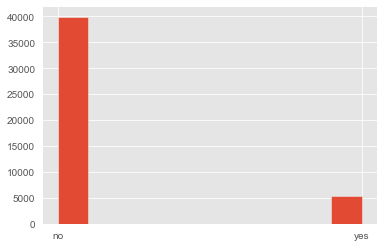

In [5]:
Data["y"].hist()

## Análisis descriptivo de las variables independientes

In [6]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


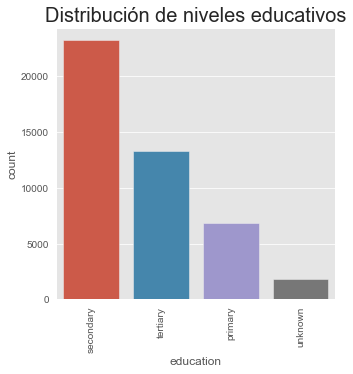

In [8]:
plt.figure(figsize= (5,5))
sns.countplot(x='education', order=Data['education'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución de niveles educativos", fontsize=20);

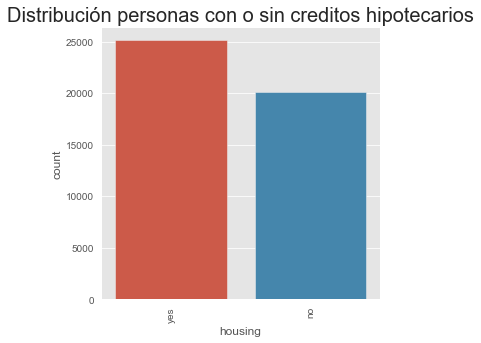

In [9]:
plt.figure(figsize= (5,5))
sns.countplot(x='housing', order=Data['housing'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución personas con o sin creditos hipotecarios", fontsize=20);

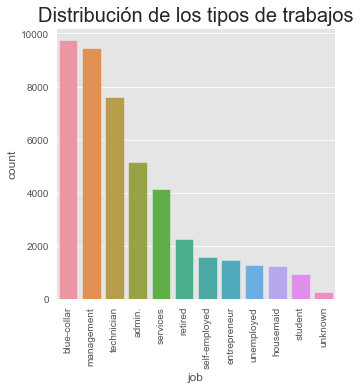

In [10]:
plt.figure(figsize= (5,5))
sns.countplot(x='job', order=Data['job'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución de los tipos de trabajos", fontsize=20);

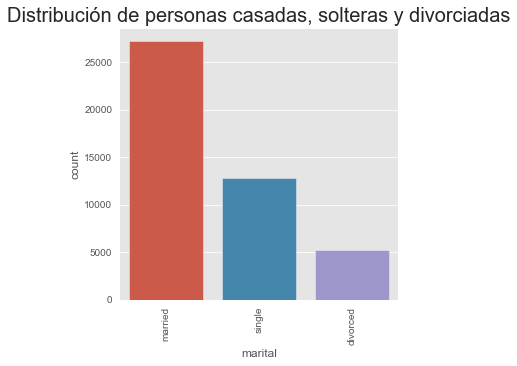

In [11]:
plt.figure(figsize= (5,5))
sns.countplot(x='marital', order=Data['marital'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución de personas casadas, solteras y divorciadas", fontsize=20);

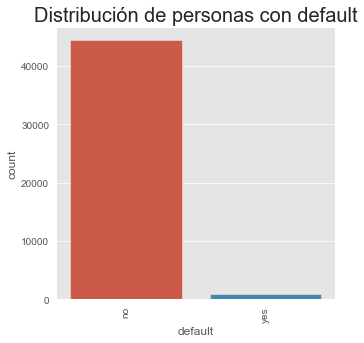

In [12]:
plt.figure(figsize= (5,5))
sns.countplot(x='default', order=Data['default'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución de personas con default", fontsize=20);

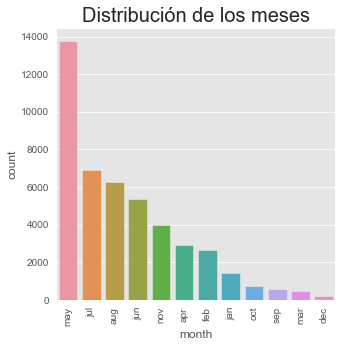

In [13]:
plt.figure(figsize= (5,5))
sns.countplot(x='month', order=Data['month'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución de los meses", fontsize=20);

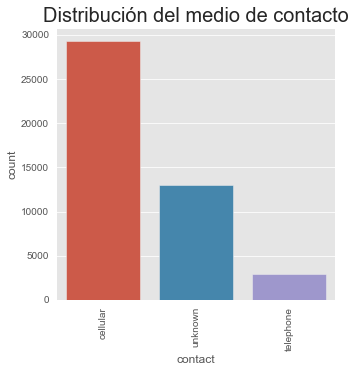

In [14]:
plt.figure(figsize= (5,5))
sns.countplot(x='contact', order=Data['contact'].value_counts().index, data = Data) 
plt.xticks(rotation=90)
plt.title("Distribución del medio de contacto", fontsize=20);

## Creación de variables dummy

In [15]:
dummy1 = pd.get_dummies(Data['marital'], prefix='marital')
Data = pd.concat([Data, dummy1], axis = 1)
dummy2 = pd.get_dummies(Data['job'], prefix='job')
Data = pd.concat([Data, dummy2], axis = 1)
dummy3 = pd.get_dummies(Data['default'], prefix='default')
Data = pd.concat([Data, dummy3], axis = 1)
dummy4 = pd.get_dummies(Data['education'], prefix='education')
Data = pd.concat([Data, dummy4], axis = 1)
dummy5 = pd.get_dummies(Data['contact'], prefix='contact')
Data = pd.concat([Data, dummy5], axis = 1)
dummy6 = pd.get_dummies(Data['housing'], prefix='housing')
Data = pd.concat([Data, dummy6], axis = 1)

In [16]:
dummy7 = pd.get_dummies(Data['y'], prefix='y')
Data = pd.concat([Data, dummy7], axis = 1)
dummy8 = pd.get_dummies(Data["poutcome"], prefix='poutcome')
dataBalance = pd.concat([Data, dummy8], axis = 1)
dummy9 = pd.get_dummies(Data["loan"], prefix='loan')
dataBalance = pd.concat([Data, dummy9], axis = 1)

In [17]:
Data["month"].replace(Data["month"].value_counts().index, [5,7,8,6,11,4,2,1,10,9,3,12], inplace=True)

## Analisis Exploratorio

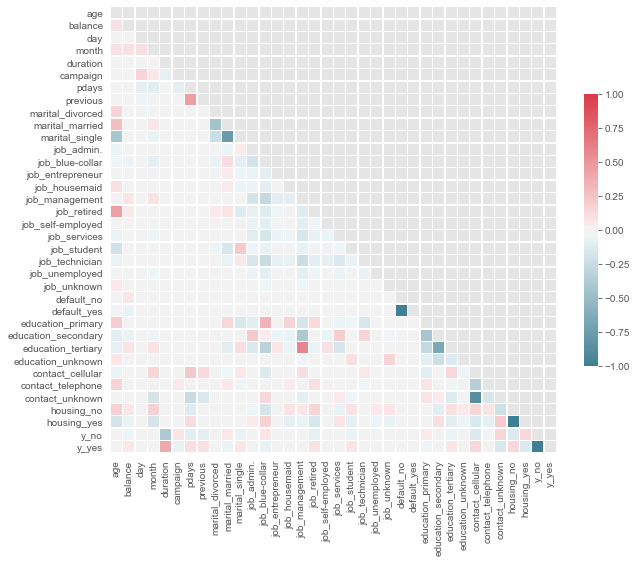

In [18]:
# Matriz de correlación
df_correlations = Data.corr()

# Enmascarar la mitad superior para fines de visualización
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Dibuje el mapa de calor con la máscara y la relación de aspecto correcta
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Se observan algunas relaciones logicas como la edad con las personas pensionadas, casadas o divorciadas, otra relación interesante es la que tienen la educación terciaria con el trabajo de management, este mismo tipo de trabajo encuentra una correlación negativa con la educación secundaria.

Text(0.5, 1.0, 'Exito por tipo de trabajo')

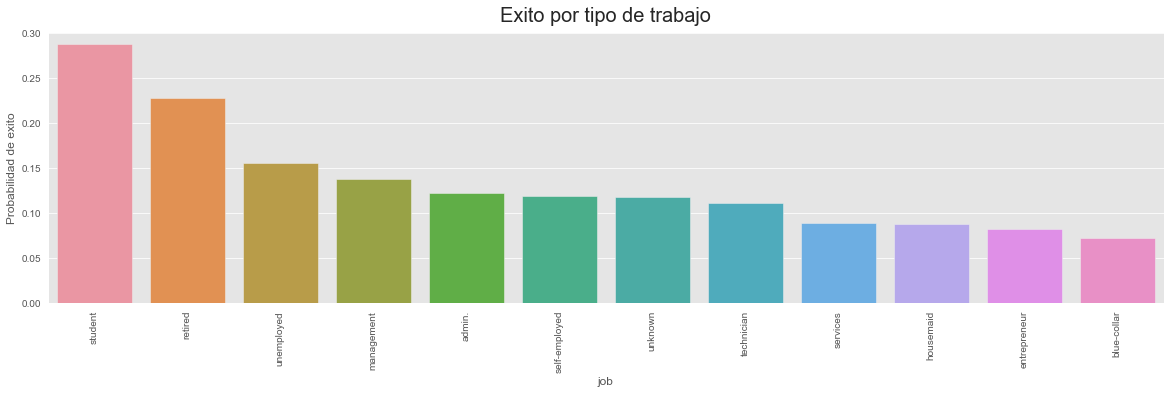

In [19]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "job"]].groupby("job").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por tipo de trabajo", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por mes')

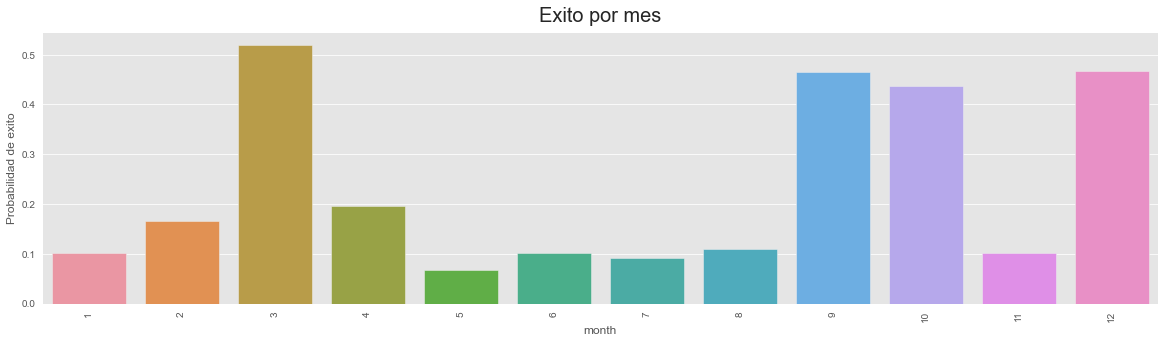

In [20]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "month"]].groupby("month").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por mes", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por estado civil')

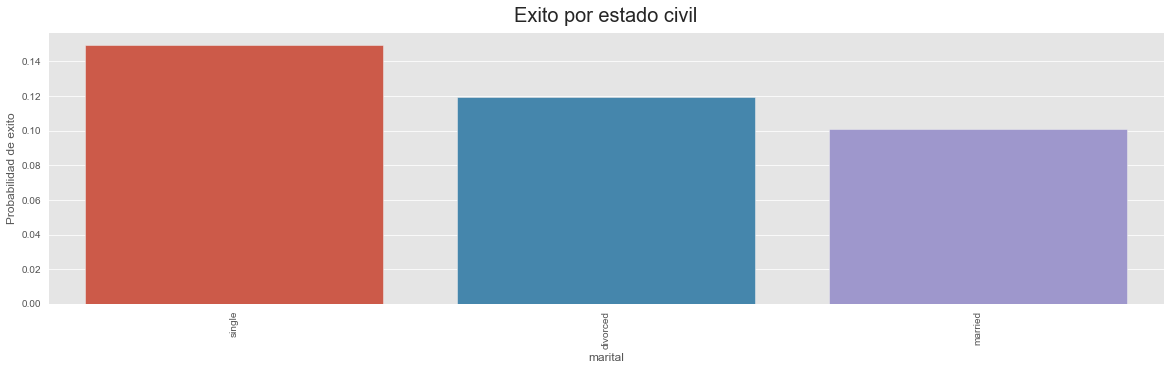

In [21]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "marital"]].groupby("marital").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por estado civil", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por medio de contacto')

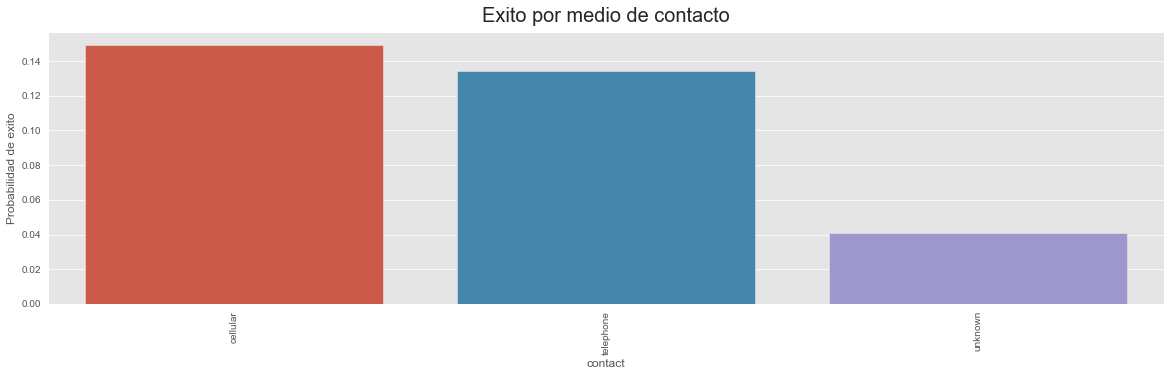

In [22]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "contact"]].groupby("contact").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por medio de contacto", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por hipoteca')

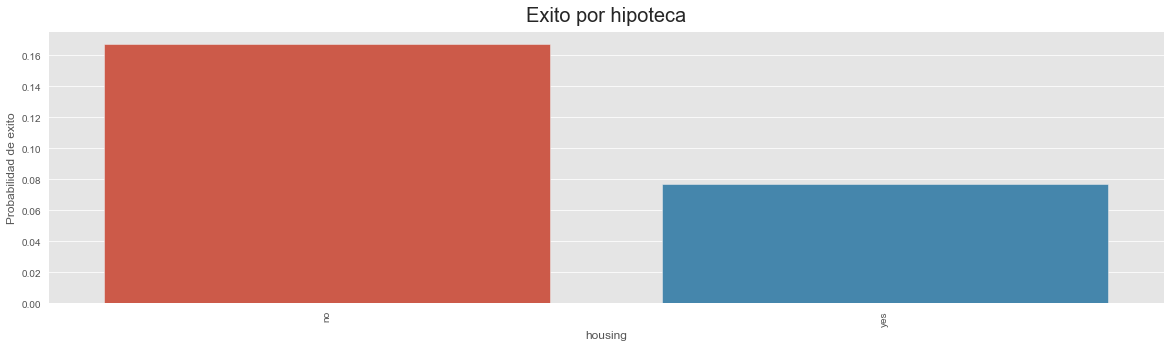

In [23]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "housing"]].groupby("housing").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por hipoteca", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por default')

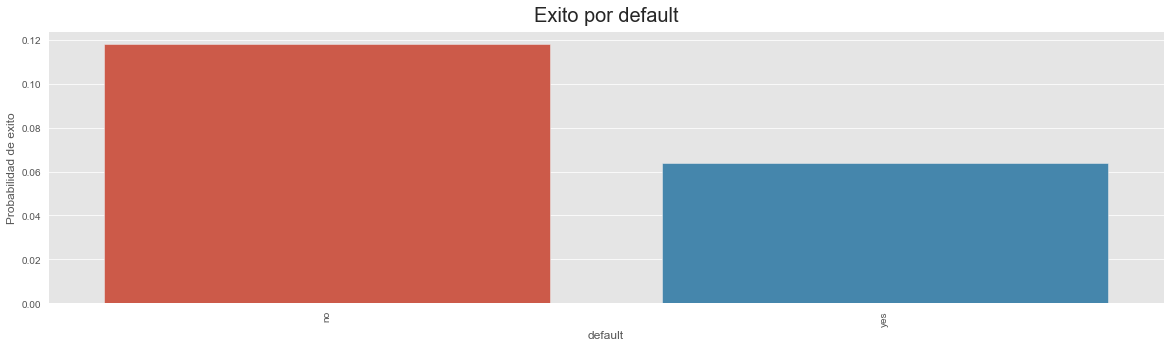

In [24]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "default"]].groupby("default").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por default", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por dia de mes')

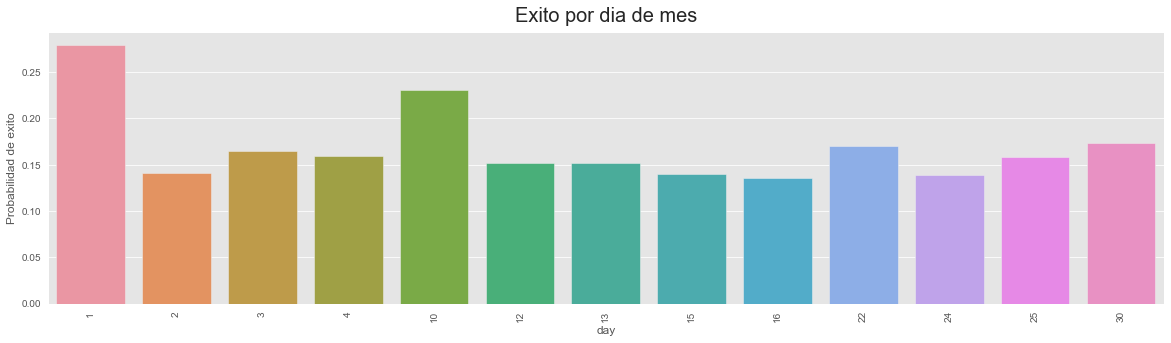

In [25]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "day"]].groupby("day").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por dia de mes", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por prestamo')

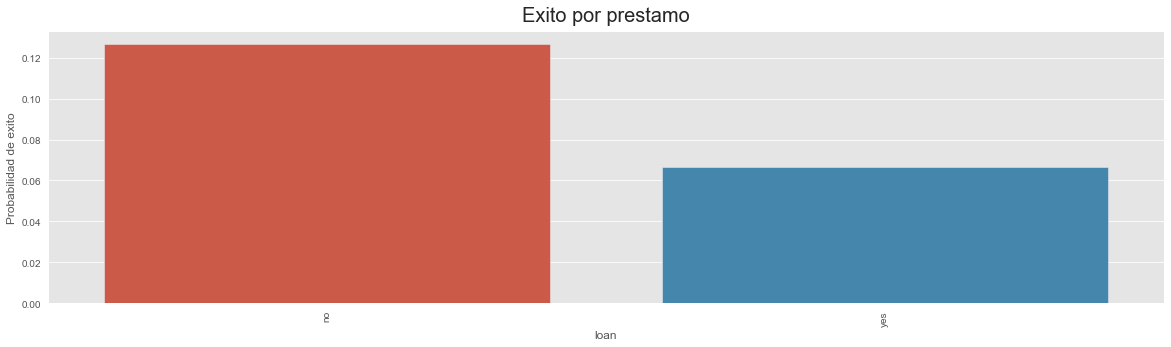

In [26]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "loan"]].groupby("loan").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por prestamo", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Exito por resultados previos')

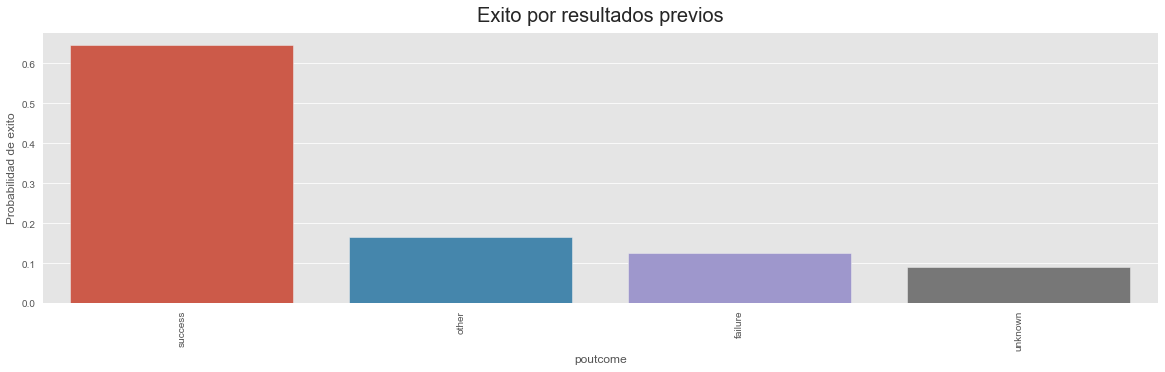

In [27]:
plt.figure(figsize= (20,5))

df_job_default = Data[["y_yes", "poutcome"]].groupby("poutcome").mean()
df_job_default = df_job_default.sort_values(by="y_yes",axis=0, ascending=False)
sns.barplot(x=df_job_default.index[:13], 
            y=df_job_default["y_yes"][:13].values,
            orient="v")
plt.xticks(rotation=90)

plt.ylabel("Probabilidad de exito")
plt.title("Exito por resultados previos", fontsize=20, verticalalignment='bottom')


Text(0.5, 1.0, 'Edad - Exito de la campaña')

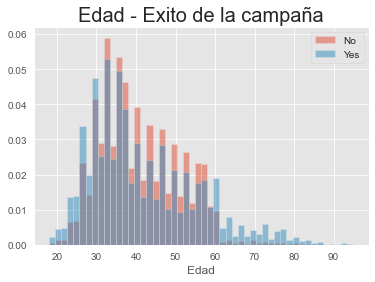

In [28]:
Data['age'][Data.y_yes == 0].hist(bins=50, density=True, alpha=0.5, label="No")
Data['age'][Data.y_yes == 1].hist(bins=50, density=True, alpha=0.5, label="Yes")
plt.xlabel("Edad")
plt.legend()
plt.title("Edad - Exito de la campaña", fontsize=20)

Text(0.5, 1.0, 'Duración - Exito de la campaña')

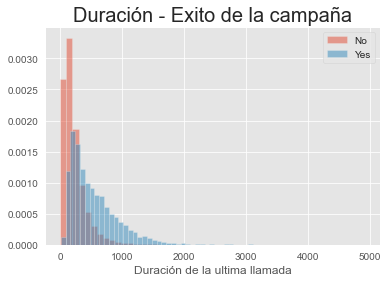

In [29]:
Data['duration'][Data.y_yes == 0].hist(bins=50, density=True, alpha=0.5, label="No")
Data['duration'][Data.y_yes == 1].hist(bins=50, density=True, alpha=0.5, label="Yes")
plt.xlabel("Duración de la ultima llamada")
plt.legend()
plt.title("Duración - Exito de la campaña", fontsize=20)

Text(0.5, 1.0, 'Día - Exito de la campaña')

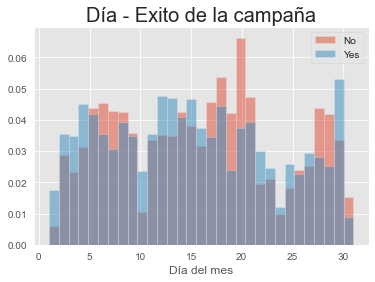

In [30]:
Data['day'][Data.y_yes == 0].hist(bins=31, density=True, alpha=0.5, label="No")
Data['day'][Data.y_yes == 1].hist(bins=31, density=True, alpha=0.5, label="Yes")
plt.xlabel("Día del mes")
plt.legend()
plt.title("Día - Exito de la campaña", fontsize=20)

Text(0.5, 1.0, 'Llamadas - Exito de la campaña')

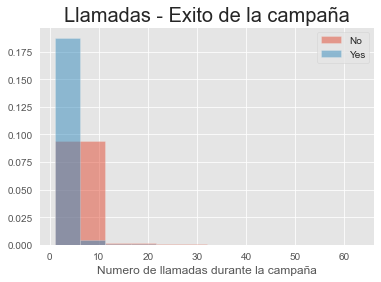

In [31]:
Data['campaign'][Data.y_yes == 0].hist(bins=6, density=True, alpha=0.5, label="No")
Data['campaign'][Data.y_yes == 1].hist(bins=6, density=True, alpha=0.5, label="Yes")
plt.xlabel("Numero de llamadas durante la campaña")
plt.legend()
plt.title("Llamadas - Exito de la campaña", fontsize=20)

Text(0.5, 1.0, 'Dias previos - Exito de la campaña')

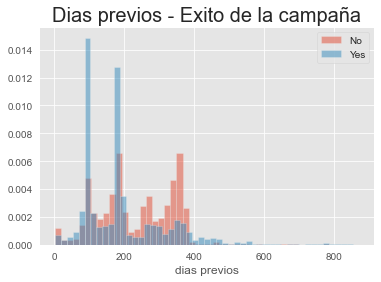

In [32]:
Data['pdays'][Data.pdays!=-1][Data.y_yes == 0].hist(bins=50, density=True, alpha=0.5, label="No")
Data['pdays'][Data.pdays!=-1][Data.y_yes == 1].hist(bins=50, density=True, alpha=0.5, label="Yes")
plt.xlabel("dias previos")
plt.legend()
plt.title("Dias previos - Exito de la campaña", fontsize=20)

Text(0.5, 1.0, 'Contactos - Exito de la campaña')

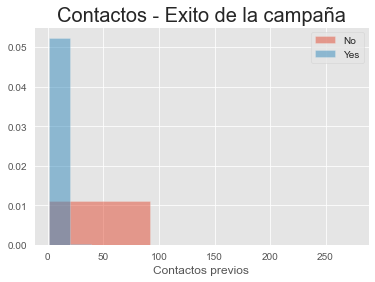

In [33]:
Data['previous'][Data.pdays!=-1][Data.y_yes == 0].hist(bins=3, density=True, alpha=0.5, label="No")
Data['previous'][Data.pdays!=-1][Data.y_yes == 1].hist(bins=3, density=True, alpha=0.5, label="Yes")
plt.xlabel("Contactos previos")
plt.legend()
plt.title("Contactos - Exito de la campaña", fontsize=20)

## Balanceo de la muestra

In [34]:
df_exito = Data.loc[Data['y_yes'] == 1]
df_n_exito = Data.loc[Data['y_yes'] == 0]

df_n_exito = resample(df_n_exito,
                       replace = False,
                       n_samples = len(df_exito),
                       random_state = 27)

dataBalance = pd.concat([df_n_exito, df_exito])

dataBalance.y_yes.value_counts()

1    5289
0    5289
Name: y_yes, dtype: int64

In [35]:
dataBalance.drop(["job","marital","education","default","balance","housing","contact","poutcome","y","duration","loan","y_no"],axis=1, inplace=True)

# División de conjuntos de entrenamiento y testeo

In [36]:
y = dataBalance.y_yes
X = dataBalance.drop('y_yes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

## Árboles de decisión

In [37]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def hyperopt_train_test(params):
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=20, trials=trials)
print('best:')
print(best)

100%|██████████| 20/20 [00:01<00:00, 15.29trial/s, best loss: -0.6581177676400811]
best:
{'criterion': 1, 'max_depth': 13, 'max_features': 3}


In [38]:
DT = DecisionTreeClassifier(criterion = "gini", max_depth = 8, max_features = 2)
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)
DT_roc_auc = roc_auc_score(y_test, DT_pred)
DT_roc_auc

0.6372222415784692

## Random forest

In [39]:
def hyperopt_train_test(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=20, trials=trials)
print('best:')
print(best)

100%|██████████| 20/20 [00:04<00:00,  4.83trial/s, best loss: -0.688369925391579]
best:
{'criterion': 0, 'max_depth': 8, 'max_features': 2, 'n_estimators': 11}


In [40]:
RF = RandomForestClassifier(criterion="gini", max_depth=10, max_features=2, 
                            n_estimators=16)
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)
RF_roc_auc = roc_auc_score(y_test, RF_pred)

In [41]:
RF_roc_auc

0.6909492273730684

## K vecinos más cercanos

In [42]:
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(2,10))
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=20, trials=trials)
print('best:')
print(best)

100%|██████████| 20/20 [00:23<00:00,  1.15s/trial, best loss: -0.6745449556580495]
best:
{'n_neighbors': 6}


In [43]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN_model = KNN.fit(X_train,y_train)
KNN_pred = KNN_model.predict(X_test)
KNN_roc_auc = roc_auc_score(y_test, KNN_pred)

In [44]:
KNN_roc_auc

0.6707301384805465

In [45]:
confusion_matrix(y_test,RF_pred)

array([[756, 301],
       [353, 706]], dtype=int64)

## Gradiant boosting

In [46]:
def hyperopt_train_test(params):
    clf = GradientBoostingClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=20, trials=trials)
print('best:')
print(best)

100%|██████████| 20/20 [00:42<00:00,  2.10s/trial, best loss: -0.6925054353973181]
best:
{'learning_rate': 0.44408173095398956, 'max_depth': 5, 'max_features': 2, 'n_estimators': 16}


In [47]:
GB = GradientBoostingClassifier(learning_rate= 0.07840098614912164,max_depth=12,max_features=3,n_estimators=17)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
GB_roc_auc = roc_auc_score(y_test, GB_pred)
GB_roc_auc

0.6956965702814906

## Comparación de modelos

In [48]:
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:, 1])
RF_fpr, RF_tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:, 1])
GB_fpr, GB_tpr, thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:, 1])
KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:, 1])

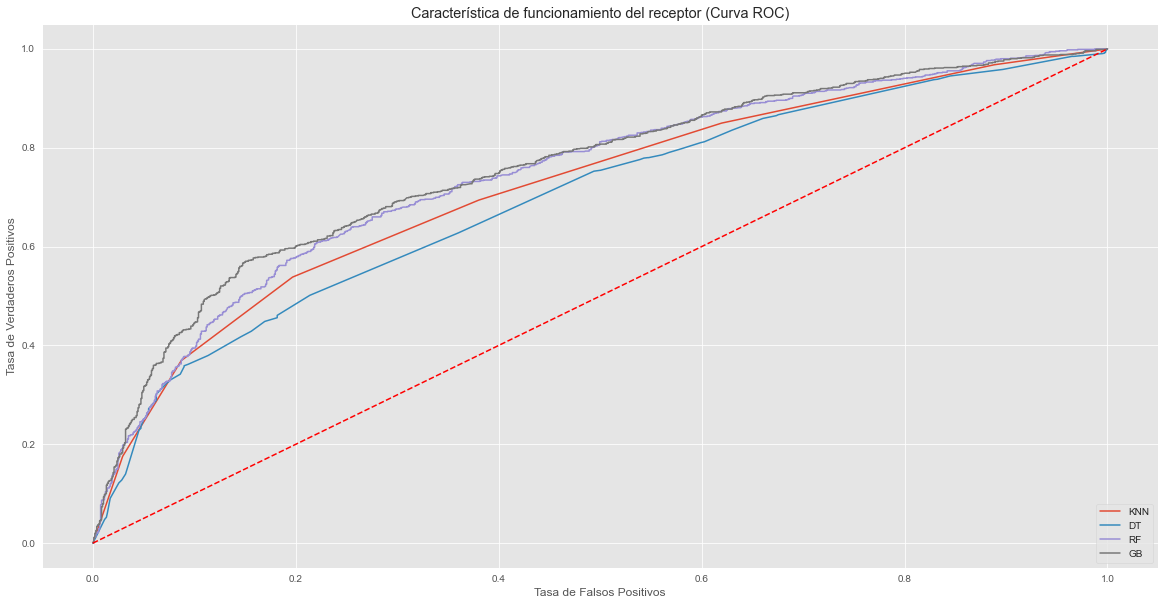

In [49]:
plt.figure(figsize=(20,10))
plt.plot(KNN_fpr, KNN_tpr, label='KNN')
plt.plot(DT_fpr, DT_tpr, label='DT')
plt.plot(RF_fpr, RF_tpr, label='RF')
plt.plot(GB_fpr, GB_tpr, label='GB')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")

## Importancia de los atributos para el modelo seleccionado

In [50]:
features = pd.DataFrame({"features_names":dataBalance.drop(columns= ["y_yes"],axis=1).columns, "Importance":GB.feature_importances_})

In [51]:
features.sort_values(by=['Importance'], ascending=False).reset_index().drop(["index"],axis=1)

,features_names,Importance
0,age,0.131725
1,month,0.131191
2,day,0.116642
3,pdays,0.096947
4,campaign,0.081809
5,previous,0.066707
6,contact_unknown,0.065467
7,housing_yes,0.044318
8,housing_no,0.039801
9,contact_cellular,0.034697
